In [1]:
import pandas as pd
import mplfinance as mpf
import os


cme_file = 'comex_gold.csv'
sh_file = 'shanghai_gold_9999.csv'


def read_data(file_path):
    df = pd.read_csv(file_path, parse_dates=['date'], index_col='date')
    parse_dates = ['date']
    index_col = 'date'

    df = df[['open', 'high', 'low', 'close']]
    df.columns = ['Open', 'High', 'Low', 'Close']

    df.sort_index(inplace=True)

    return df

cme_df = read_data(cme_file)
sh_df = read_data(sh_file)

In [2]:
my_color = mpf.make_marketcolors(up='red', down='green', edge='inherit', wick='inherit')
my_style = mpf.make_mpf_style(marketcolors=my_color, gridstyle='--', gridcolor='lightgray', y_on_right=True)

In [3]:
combined = pd.concat([cme_df, sh_df], axis=1, join='outer', keys=['CME', 'SH'])

In [4]:
cme_aligned = combined['CME']
sh_aligned = combined['SH']

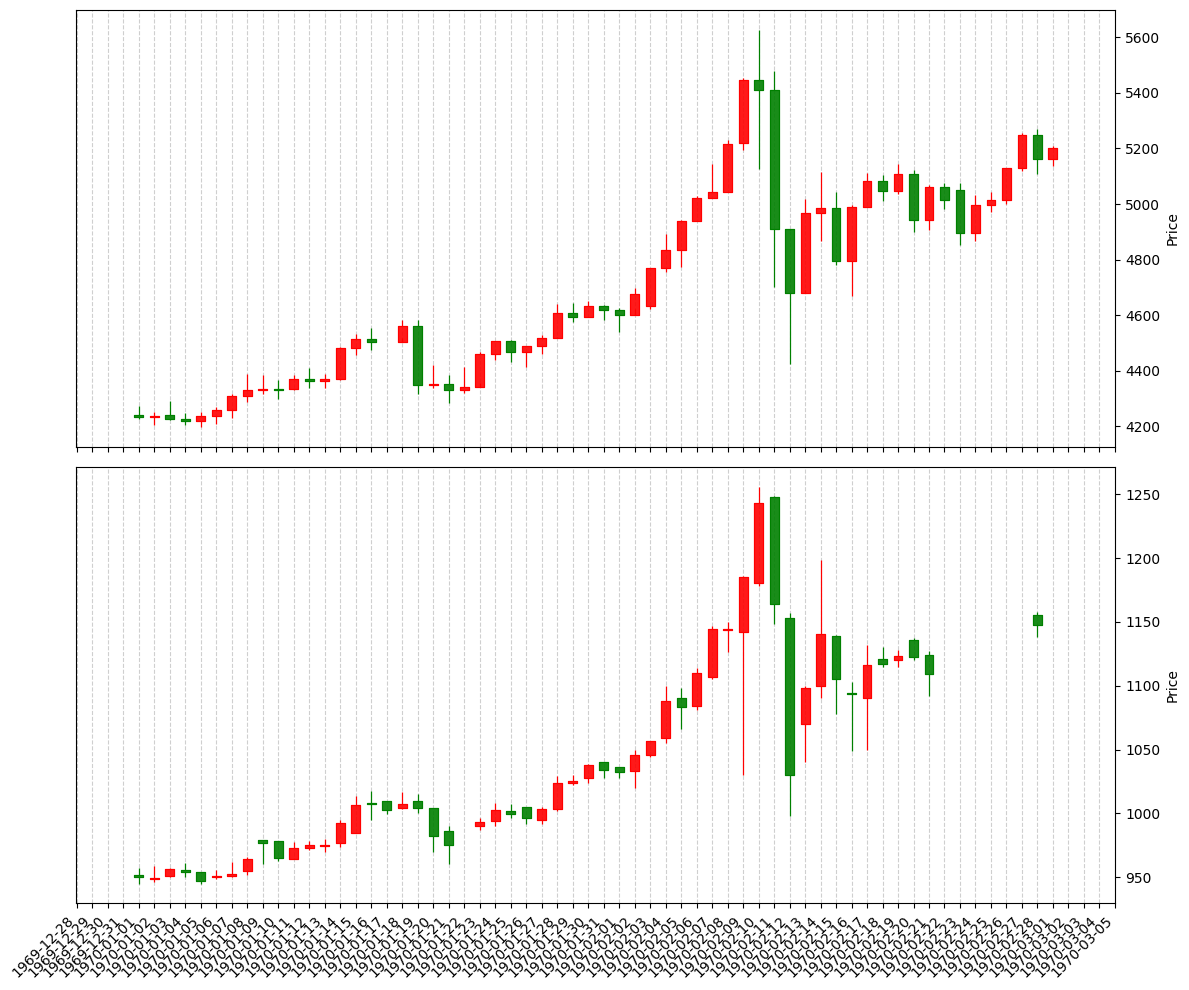

In [6]:
from matplotlib import pyplot as plt
from matplotlib.dates import DayLocator, DateFormatter

fig, axlist = plt.subplots(2, 1, sharex=True, figsize=(12, 10))
mpf.plot(cme_aligned.tail(60), type='candle', style=my_style, ax=axlist[0])
mpf.plot(sh_aligned.tail(60), type='candle', style=my_style, ax=axlist[1])

locator = DayLocator(interval=1)

for ax in axlist:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.grid(True, axis='x', which='major', linestyle='--', alpha=0.6)

fig.autofmt_xdate(rotation=45, ha='right')
plt.tight_layout()
plt.show()